# Initialization - packages, create list of team abbreviations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#repull from API for most up to date day of data
from sportsipy.nhl.teams import Teams

teams = Teams()


In [3]:
#creat list of team abbreviations
teams_abr = []
for team in teams:
    teams_abr.append(team.abbreviation)

In [4]:
from sportsipy.nhl.schedule import Schedule

# Pull each teams games/results by day over course of season to date, use for visualizations

In [5]:
#Update dataframe with each team's played games to date
#for later: add conference, divisions for filtering - can use teams_conference_division_reference dataframe below
#when plotting points over season: use 'game' column as x access to stay consistent across teams

time_series_df = pd.DataFrame()        #rename to time_series_df at some point

for abr in teams_abr:
    x_sch = Schedule(abr)           #get current team's schedule
    temp_df = x_sch.dataframe       
    temp_df['team'] = abr           #add team column
    time_series_df = time_series_df.append(temp_df)        #append to combined dataframe

time_series_df = time_series_df.loc[time_series_df['pdo'].notnull()].set_index('boxscore_index')   #use pdo to filter out games that have not been played yet



In [6]:
time_series_df

,date,datetime,game,goals_allowed,goals_scored,location,opponent_abbr,opponent_name,overtime,penalties_in_minutes,power_play_goals,power_play_opportunities,result,short_handed_goals,shots_on_goal,opp_shots_on_goal,opp_penalties_in_minutes,opp_power_play_goals,opp_power_play_opportunities,opp_short_handed_goals,corsi_for,corsi_against,corsi_for_percentage,fenwick_for,fenwick_against,fenwick_for_percentage,faceoff_wins,faceoff_losses,faceoff_win_percentage,offensive_zone_start_percentage,pdo,team
boxscore_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
202110120TBL,2021-10-12,2021-10-12,1,6,2,Home,PIT,Pittsburgh Penguins,0,2,0,1,Loss,0,28,35,2,0,1,0,52,57,47.7,38,47,44.7,32,32,50,46.3,90.3,TBL
202110140DET,2021-10-14,2021-10-14,2,6,7,Away,DET,Detroit Red Wings,1,20,3,7,Win,0,48,26,26,1,5,0,48,29,62.3,41,23,64.1,24,19,55.8,57.9,85.8,TBL
202110160WSH,2021-10-16,2021-10-16,3,1,2,Away,WSH,Washington Capitals,1,8,0,1,Win,0,24,33,2,0,4,0,54,46,54,38,33,53.5,24,25,49,49.3,104.5,TBL
202110190TBL,2021-10-19,2021-10-19,4,4,1,Home,FLA,Florida Panthers,0,6,0,6,Loss,0,31,32,12,1,3,0,36,42,46.2,30,31,49.2,31,17,64.6,59.4,92.5,TBL
202110230TBL,2021-10-23,2021-10-23,5,4,3,Home,COL,Colorado Avalanche,-1,14,0,3,OTL,0,32,27,8,1,6,0,45,34,57,39,26,60,28,22,56,72.4,101,TBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202112100ARI,2021-12-10,2021-12-10,26,3,1,Home,FLA,Florida Panthers,0,8,1,5,Loss,0,23,23,10,1,4,0,31,33,48.4,22,27,44.9,21,20,51.2,44.4,89.5,ARI
202112110ARI,2021-12-11,2021-12-11,27,5,3,Home,PHI,Philadelphia Flyers,0,6,0,2,Loss,0,32,34,4,1,3,0,53,49,52,40,36,52.6,21,20,51.2,57.7,95.9,ARI
202112150ARI,2021-12-15,2021-12-15,28,3,2,Home,NYR,New York Rangers,0,8,0,2,Loss,1,31,30,6,2,3,0,46,41,52.9,38,34,52.8,13,32,28.9,36.4,100,ARI


# Use teams dataframe to pull points, games_played, add games_remaining and points_per_game, and total_points_pace

In [7]:
teams_df = teams.dataframes

In [8]:
#update games remaining, pointers per game, and points pace based on latest day of data
teams_df['games_remaining'] = 82 - teams_df['games_played']
teams_df['points_per_game'] = teams_df['points'] / teams_df['games_played']
teams_df['total_points_pace'] = np.round(teams_df['points'] + (teams_df['games_remaining'] * teams_df['points_per_game']), 0)



In [9]:
#use this df & csv for sake of mapping conferences, divisions - manually updated csv to map teams 

##################### don't need to run this cell again ###################

teams_conference_div_reference_df = pd.read_csv('teams_conference_division_reference.csv').set_index('abbreviation').drop('Unnamed: 0', axis=1)


In [10]:
#create dictionaries for conference, division for reference
conferences = dict(zip(teams_conference_div_reference_df.index, teams_conference_div_reference_df.conference))
divisions = dict(zip(teams_conference_div_reference_df.index, teams_conference_div_reference_df.division))

In [11]:
#adds conferences and divisions to refreshed teams dataframe pulled from API
teams_df['conference'] = teams_df['abbreviation'].map(conferences)
teams_df['division'] = teams_df['abbreviation'].map(divisions)


In [12]:
#update file name to export and save as needed
teams_df.to_csv('teams_points_df_updated_12-27-21.csv')

In [13]:
#sort teams by conference, points pace
teams_df[['conference','division','name','points','points_percentage','games_played','total_points_pace']].sort_values(by=['conference','total_points_pace'], ascending=False)




,conference,division,name,points,points_percentage,games_played,total_points_pace
MIN,Western,Central,Minnesota Wild,40,0.667,30,109.0
COL,Western,Central,Colorado Avalanche,36,0.667,27,109.0
NSH,Western,Central,Nashville Predators,39,0.650,30,107.0
CGY,Western,Pacific,Calgary Flames,36,0.643,28,105.0
VEG,Western,Pacific,Vegas Golden Knights,42,0.636,33,104.0
STL,Western,Central,St. Louis Blues,39,0.629,31,103.0
ANA,Western,Pacific,Anaheim Ducks,40,0.625,32,102.0
EDM,Western,Pacific,Edmonton Oilers,36,0.621,29,102.0
WPG,Western,Central,Winnipeg Jets,33,0.550,30,90.0
DAL,Western,Central,Dallas Stars,32,0.552,29,90.0


# More time series dataframe work 

In [14]:
#add in conference and division for filtering
#use index map bc time series df has team abbr as index, not separate column

time_series_df['conference'] = time_series_df['team'].map(conferences)
time_series_df['division'] = time_series_df['team'].map(divisions)


In [15]:
#add points_earned based on result column - this will be points earned from that single game

#create list of conditions
conditions = [(time_series_df['result'] == 'Win'), (time_series_df['result'] == 'OTL'), (time_series_df['result'] == 'Loss')]

#create list of values assigned to each division
values = [2, 1, 0]

#create new df column and use select function with above conditions and values as inputs
time_series_df['points_earned'] = np.select(conditions, values)


In [16]:
#add column for cumulative points total over course of season by team
time_series_df['rolling_points_total'] = time_series_df.groupby(['team'])['points_earned'].cumsum()




In [17]:
time_series_df.head()

,date,datetime,game,goals_allowed,goals_scored,location,opponent_abbr,opponent_name,overtime,penalties_in_minutes,power_play_goals,power_play_opportunities,result,short_handed_goals,shots_on_goal,opp_shots_on_goal,opp_penalties_in_minutes,opp_power_play_goals,opp_power_play_opportunities,opp_short_handed_goals,corsi_for,corsi_against,corsi_for_percentage,fenwick_for,fenwick_against,fenwick_for_percentage,faceoff_wins,faceoff_losses,faceoff_win_percentage,offensive_zone_start_percentage,pdo,team,conference,division,points_earned,rolling_points_total
boxscore_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
202110120TBL,2021-10-12,2021-10-12,1,6,2,Home,PIT,Pittsburgh Penguins,0,2,0,1,Loss,0,28,35,2,0,1,0,52,57,47.7,38,47,44.7,32,32,50,46.3,90.3,TBL,Eastern,Atlantic,0,0
202110140DET,2021-10-14,2021-10-14,2,6,7,Away,DET,Detroit Red Wings,1,20,3,7,Win,0,48,26,26,1,5,0,48,29,62.3,41,23,64.1,24,19,55.8,57.9,85.8,TBL,Eastern,Atlantic,2,2
202110160WSH,2021-10-16,2021-10-16,3,1,2,Away,WSH,Washington Capitals,1,8,0,1,Win,0,24,33,2,0,4,0,54,46,54,38,33,53.5,24,25,49,49.3,104.5,TBL,Eastern,Atlantic,2,4
202110190TBL,2021-10-19,2021-10-19,4,4,1,Home,FLA,Florida Panthers,0,6,0,6,Loss,0,31,32,12,1,3,0,36,42,46.2,30,31,49.2,31,17,64.6,59.4,92.5,TBL,Eastern,Atlantic,0,4
202110230TBL,2021-10-23,2021-10-23,5,4,3,Home,COL,Colorado Avalanche,-1,14,0,3,OTL,0,32,27,8,1,6,0,45,34,57,39,26,60,28,22,56,72.4,101,TBL,Eastern,Atlantic,1,5


In [18]:
time_series_df.to_csv('time_series_points_df.csv')

In [19]:
time_series_df.groupby(['team', 'conference'])['points_earned'].sum()

team  conference
ANA   Western       40
ARI   Western       15
BOS   Eastern       30
BUF   Eastern       25
CAR   Eastern       43
CBJ   Eastern       29
CGY   Western       36
CHI   Western       26
COL   Western       36
DAL   Western       32
DET   Eastern       33
EDM   Western       36
FLA   Eastern       40
LAK   Western       33
MIN   Western       40
MTL   Eastern       18
NJD   Eastern       25
NSH   Western       39
NYI   Eastern       22
NYR   Eastern       42
OTT   Eastern       20
PHI   Eastern       29
PIT   Eastern       39
SEA   Western       23
SJS   Western       33
STL   Western       39
TBL   Eastern       46
TOR   Eastern       42
VAN   Western       30
VEG   Western       42
WPG   Western       33
WSH   Eastern       43
Name: points_earned, dtype: int64

# Time Series Visualizations

In [20]:
from adjustText import adjust_text

23

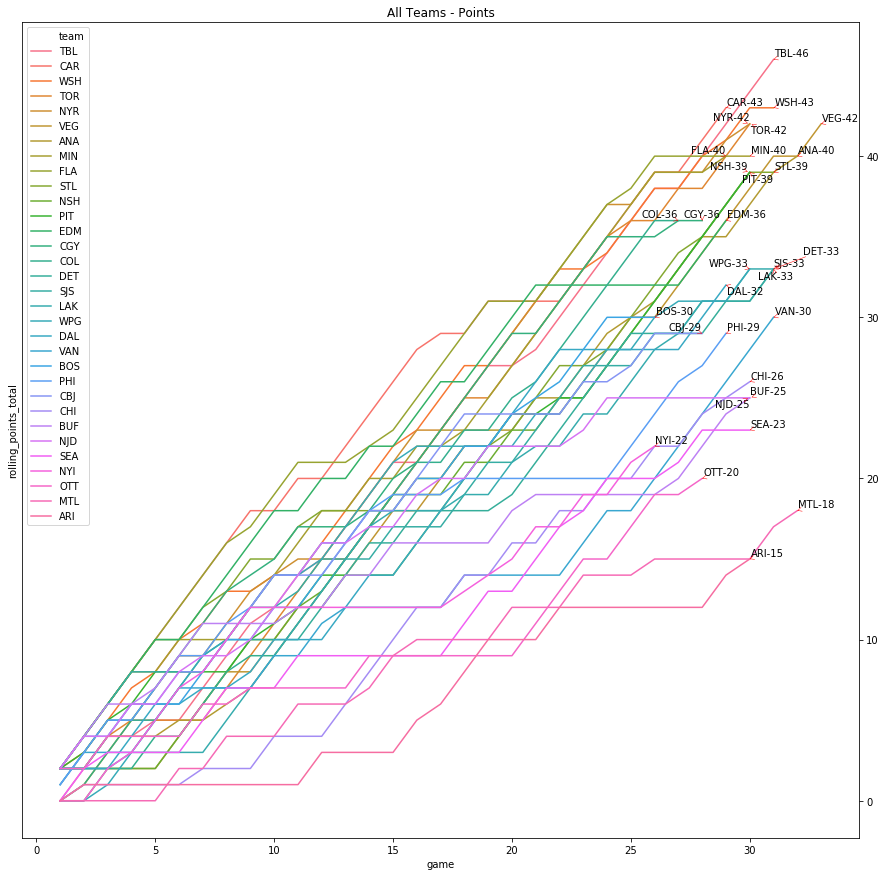

In [21]:
plt.figure(figsize=(15,15))
ax1 = sns.lineplot(x='game', y='rolling_points_total', hue = 'team', data = time_series_df)

ax1.yaxis.tick_right()

plt.title('All Teams - Points')

team_abr_update = time_series_df['team'].unique()

texts = []
count=0
for l in ax1.lines:
    y = l.get_ydata()
    x = l.get_xdata()
    if len(y)>0:
        texts.append(plt.text(x[-1],y[-1],(team_abr_update[count]+'-'+str(y[-1])))) #, color=l.get_color()
        #texts.append(ax1.annotate((teams_abr[count]+'-'+str(y[-1])), xy=(1,y[-1]), xycoords=('axes fraction', 'data'), color=l.get_color()))
    count += 1

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

#, arrowprops=dict(arrowstyle="->", color='r', lw=0.5)

5

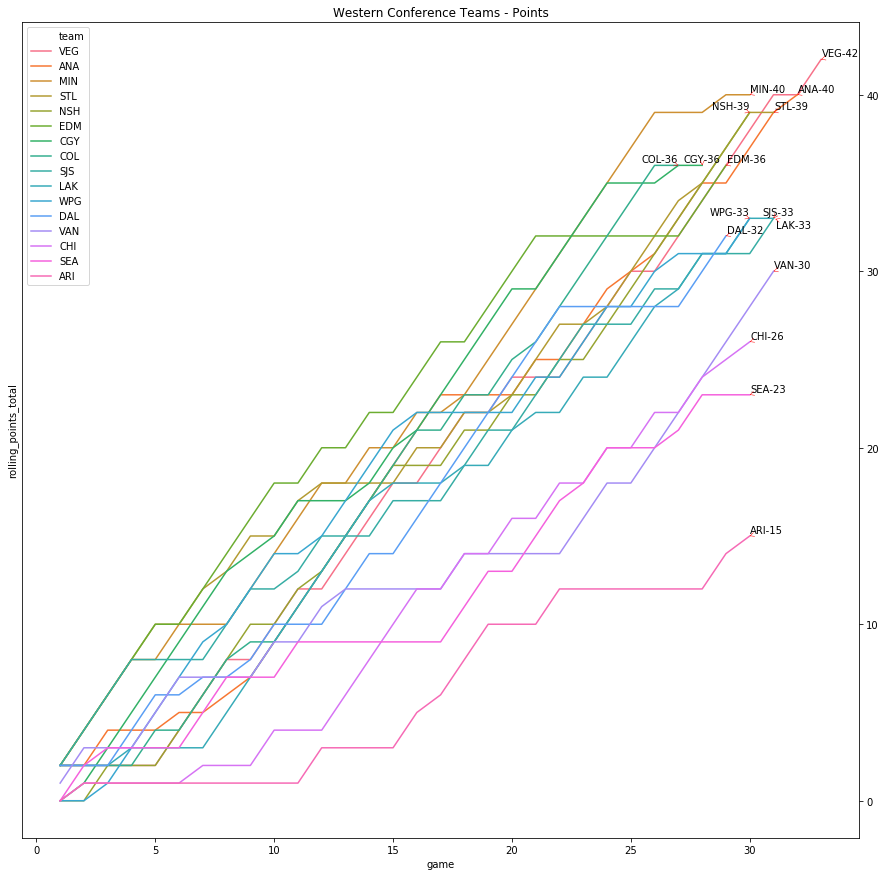

In [22]:
conference_filter = 'Western'    #Eastern Western
plt.figure(figsize=(15,15))
ax1 = sns.lineplot(x='game', y='rolling_points_total', hue = 'team', data = time_series_df.loc[time_series_df['conference']==conference_filter])

ax1.yaxis.tick_right()

plt.title(conference_filter+' Conference Teams - Points')

team_abr_update = time_series_df.loc[time_series_df['conference']==conference_filter]['team'].unique()
texts = []
count=0
for l in ax1.lines:
    y = l.get_ydata()
    x = l.get_xdata()
    if len(y)>0:
        texts.append(plt.text(x[-1],y[-1],(team_abr_update[count]+'-'+str(y[-1])))) 
        #texts.append(ax1.annotate((teams_abr[count]+'-'+str(y[-1])), xy=(1,y[-1]), xycoords=('axes fraction', 'data'), color=l.get_color()))
    count += 1

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

#, arrowprops=dict(arrowstyle="->", color='r', lw=0.5)


4

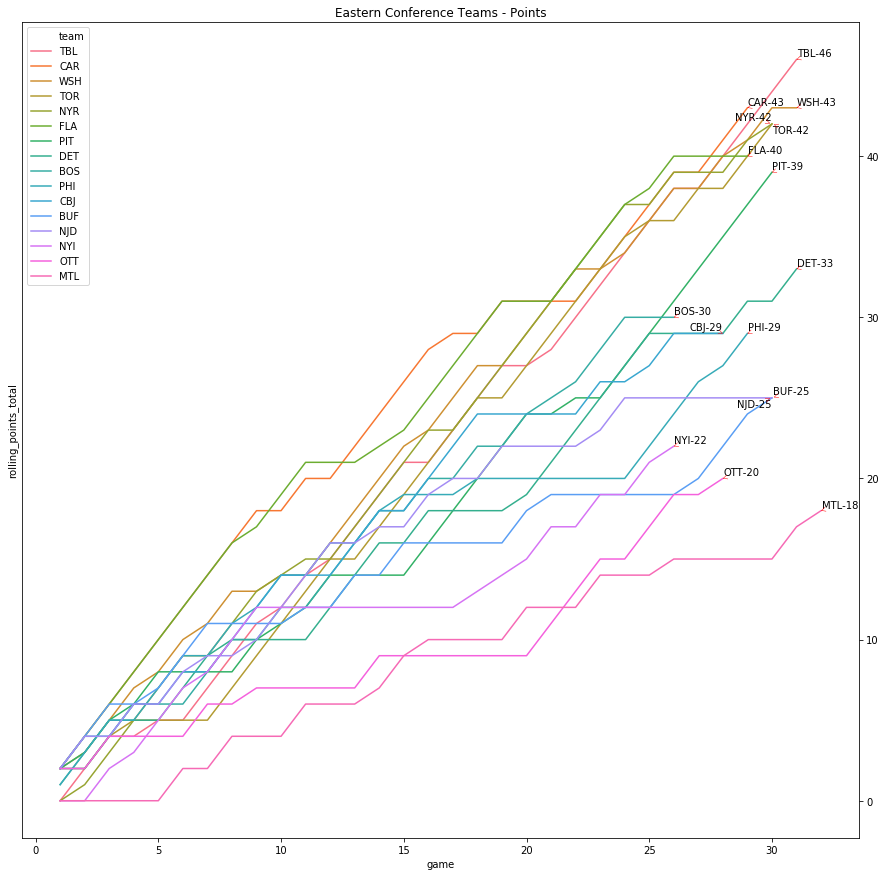

In [23]:
conference_filter = 'Eastern'    #Eastern Western
plt.figure(figsize=(15,15))
ax1 = sns.lineplot(x='game', y='rolling_points_total', hue = 'team', data = time_series_df.loc[time_series_df['conference']==conference_filter])

ax1.yaxis.tick_right()

plt.title(conference_filter+' Conference Teams - Points')

team_abr_update = time_series_df.loc[time_series_df['conference']==conference_filter]['team'].unique()
texts = []
count=0
for l in ax1.lines:
    y = l.get_ydata()
    x = l.get_xdata()
    if len(y)>0:
        texts.append(plt.text(x[-1],y[-1],(team_abr_update[count]+'-'+str(y[-1])))) 
        #texts.append(ax1.annotate((teams_abr[count]+'-'+str(y[-1])), xy=(1,y[-1]), xycoords=('axes fraction', 'data'), color=l.get_color()))
    count += 1

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

#, arrowprops=dict(arrowstyle="->", color='r', lw=0.5)

In [24]:
time_series_df.loc[time_series_df['conference']=='Eastern'].groupby(['team', 'conference'])['points_earned'].sum()

team  conference
BOS   Eastern       30
BUF   Eastern       25
CAR   Eastern       43
CBJ   Eastern       29
DET   Eastern       33
FLA   Eastern       40
MTL   Eastern       18
NJD   Eastern       25
NYI   Eastern       22
NYR   Eastern       42
OTT   Eastern       20
PHI   Eastern       29
PIT   Eastern       39
TBL   Eastern       46
TOR   Eastern       42
WSH   Eastern       43
Name: points_earned, dtype: int64

In [25]:
time_series_df.loc[time_series_df['conference']=='Western'].groupby(['team', 'conference'])['points_earned'].sum()

team  conference
ANA   Western       40
ARI   Western       15
CGY   Western       36
CHI   Western       26
COL   Western       36
DAL   Western       32
EDM   Western       36
LAK   Western       33
MIN   Western       40
NSH   Western       39
SEA   Western       23
SJS   Western       33
STL   Western       39
VAN   Western       30
VEG   Western       42
WPG   Western       33
Name: points_earned, dtype: int64